In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap
import geopandas as gdp

In [26]:
# Load the CSV file from local path 
df = pd.read_csv("Listing_AirBnB_Paris.csv")

In [27]:
# Display the first few rows --> to understand the initial structure of the data
print(df.head())

     id                                               name  host_id  \
0  3109  Rental unit in Paris · ★5.0 · 1 bedroom · 1 be...     3631   
1  5396  Rental unit in Paris · ★4.59 · Studio · 1 bed ...     7903   
2  7397  Rental unit in Paris · ★4.73 · 2 bedrooms · 2 ...     2626   
3  7964  Rental unit in Paris · ★4.80 · 1 bedroom · 1 b...    22155   
4  9359  Rental unit in Paris · 1 bedroom · 1 bed · 1 bath    28422   

    host_name  neighbourhood_group   neighbourhood  latitude  longitude  \
0        Anne                  NaN    Observatoire  48.83191    2.31870   
1      Borzou                  NaN  Hôtel-de-Ville  48.85247    2.35835   
2      Franck                  NaN  Hôtel-de-Ville  48.85909    2.35315   
3       Anaïs                  NaN           Opéra  48.87417    2.34245   
4  Bernadette                  NaN          Louvre  48.86006    2.34863   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt  150.0               2     

In [28]:
# Display the shape of the dataframe
print(df.shape)

(74329, 18)


In [29]:
# Display information about the dataframe such as data types and non-null counts
#-->
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74329 entries, 0 to 74328
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              74329 non-null  int64  
 1   name                            74329 non-null  object 
 2   host_id                         74329 non-null  int64  
 3   host_name                       74320 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   74329 non-null  object 
 6   latitude                        74329 non-null  float64
 7   longitude                       74329 non-null  float64
 8   room_type                       74329 non-null  object 
 9   price                           67108 non-null  float64
 10  minimum_nights                  74329 non-null  int64  
 11  number_of_reviews               74329 non-null  int64  
 12  last_review                     

In [30]:
# Convert 'last_review' to datetime
#df["last_review"] = pd.to_datetime(df["last_review"])

In [31]:
#print(df.head())

In [32]:
# Display the number of null values in each column 
#-->A list of columns with their corresponding missing value counts. This helps in identifying columns with missing data that may need cleaning.
print(df.isnull().sum())

id                                    0
name                                  0
host_id                               0
host_name                             9
neighbourhood_group               74329
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              7221
minimum_nights                        0
number_of_reviews                     0
last_review                       17891
reviews_per_month                 17891
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           19642
dtype: int64


In [33]:
# Calculate and display the percentage of missing values -->helping assess the severity of missing data in the dataset.
missing_percentage = (df.isnull().sum() / len(df) * 100)
print(missing_percentage)

id                                  0.000000
name                                0.000000
host_id                             0.000000
host_name                           0.012108
neighbourhood_group               100.000000
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
price                               9.714916
minimum_nights                      0.000000
number_of_reviews                   0.000000
last_review                        24.070013
reviews_per_month                  24.070013
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
license                            26.425756
dtype: float64


In [34]:
# Drop the 'neighbourhood_group' column --> it is not needed 
df.drop(columns=["neighbourhood_group"], inplace=True)

In [35]:
# Display summary statistics
print(df.describe())

                 id       host_id      latitude     longitude         price  \
count  7.432900e+04  7.432900e+04  74329.000000  74329.000000  67108.000000   
mean   4.016310e+17  1.527328e+08     48.864441      2.343779    221.161739   
std    4.385730e+17  1.767908e+08      0.018193      0.034027    662.165493   
min    3.109000e+03  2.750000e+02     48.816080      2.224640      8.000000   
25%    2.238236e+07  1.690631e+07     48.851220      2.322240     86.000000   
50%    5.139808e+07  5.724306e+07     48.865740      2.347263    129.000000   
75%    8.839130e+17  2.681704e+08     48.879210      2.369000    205.000000   
max    1.044192e+18  5.503984e+08     48.901670      2.467120  84420.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    74329.000000       74329.000000       56438.000000   
mean        57.052254          23.159897           1.126965   
std        125.497763          54.741564           1.437668   
min          1.000000           0.00

In [36]:
# Display value counts for each column
#-->the count of unique values in each column. Helps to identify the distribution of categorical values and discover potential outliers
for column in df.columns:
    print(f"----{column}----")
    print(df[column].value_counts())
    print("\n")

----id----
id
3109                   1
778352636586349192     1
776343660777321801     1
777511056306585815     1
777489341031566750     1
                      ..
32755956               1
32753783               1
32660535               1
32658895               1
1043968453109441641    1
Name: count, Length: 74329, dtype: int64


----name----
name
Rental unit in Paris · 1 bedroom · 1 bed · 1 bath                     6328
Rental unit in Paris · ★5.0 · 1 bedroom · 1 bed · 1 bath              2953
Rental unit in Paris · 1 bedroom · 2 beds · 1 bath                    2584
Rental unit in Paris · ★New · 1 bedroom · 1 bed · 1 bath              2032
Rental unit in Paris · Studio · 1 bed · 1 bath                        2025
                                                                      ... 
Loft in Paris · ★4.70 · 2 bedrooms · 2 beds · 1 bath                     1
Loft in Paris · ★5.0 · 1 bedroom · 6 beds · 1.5 baths                    1
Rental unit in Paris · ★4.59 · 2 bedrooms · 2 beds

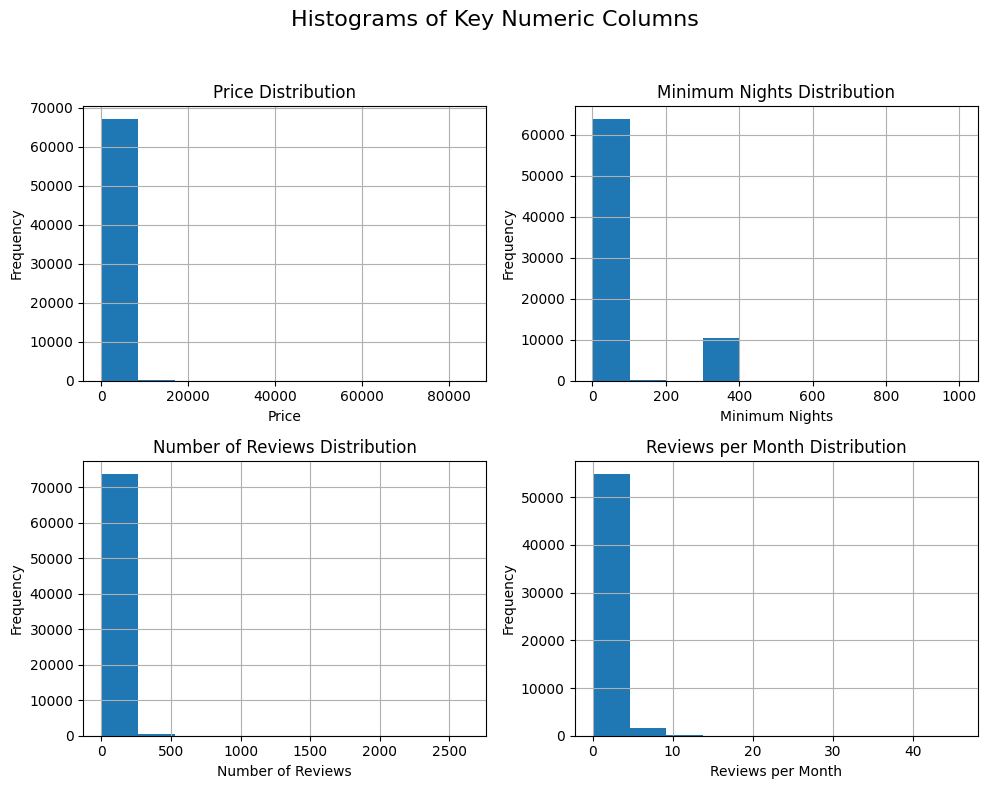

In [37]:
# Create histograms for numeric columns, helping identify skewness, spread, and outliers in the data
df[["price", "minimum_nights", "number_of_reviews", "reviews_per_month"]].hist(figsize=(10,8))

# Adding labels and titles to the individual subplots
plt.suptitle("Histograms of Key Numeric Columns", fontsize=16)

# Iterate through the axes of the subplots and label each
axes = plt.gcf().get_axes()

axes[0].set_title("Price Distribution")
axes[0].set_xlabel("Price")
axes[0].set_ylabel("Frequency")

axes[1].set_title("Minimum Nights Distribution")
axes[1].set_xlabel("Minimum Nights")
axes[1].set_ylabel("Frequency")

axes[2].set_title("Number of Reviews Distribution")
axes[2].set_xlabel("Number of Reviews")
axes[2].set_ylabel("Frequency")

axes[3].set_title("Reviews per Month Distribution")
axes[3].set_xlabel("Reviews per Month")
axes[3].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to avoid overlap with the title
plt.show()

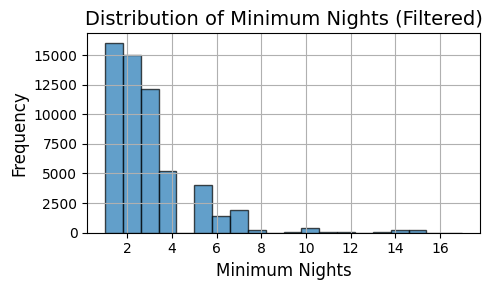

In [38]:
# Filter outliers for 'minimum_nights' column using the Interquartile Range (IQR) method
# -->displays a histogram of the filtered data. This reduces the impact of outliers on subsequent analysis
# Quantile and IQR calculations for filtering outliers in 'minimum_nights'
Q1_nights = df["minimum_nights"].quantile(0.25)
Q3_nights = df["minimum_nights"].quantile(0.75)
IQR_nights = Q3_nights - Q1_nights

lower_limit_nights = Q1_nights - 1.5 * IQR_nights
upper_limit_nights = Q3_nights + 1.5 * IQR_nights

# Filter the data to remove outliers
df_filtered_nights = df[(df["minimum_nights"] >= lower_limit_nights) & (df["minimum_nights"] <= upper_limit_nights)]

# Plot histogram with labels and title
plt.figure(figsize=(5, 3))
df_filtered_nights["minimum_nights"].hist(bins=20, edgecolor="black", alpha=0.7)  # `bins` can be changed for better granularity

# Add labels and title
plt.title("Distribution of Minimum Nights (Filtered)", fontsize=14)
plt.xlabel("Minimum Nights", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

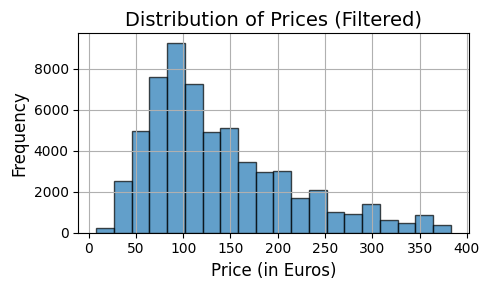

In [39]:
# Filter outliers for 'price' using the IQR method. to ensure that outlier values do not skew the price analysis
Q1_price = df["price"].quantile(0.25)
Q3_price = df["price"].quantile(0.75)
IQR_price = Q3_price - Q1_price

lower_limit_price = Q1_price - 1.5 * IQR_price
upper_limit_price = Q3_price + 1.5 * IQR_price

# Filter the data to remove outliers
df_filtered_price = df[(df["price"] >= lower_limit_price) & (df["price"] <= upper_limit_price)]

# Plot histogram with labels and title
plt.figure(figsize=(5, 3))
df_filtered_price["price"].hist(bins=20, edgecolor="black", alpha=0.7)

# Add labels and title
plt.title("Distribution of Prices (Filtered)", fontsize=14)
plt.xlabel("Price (in Euros)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

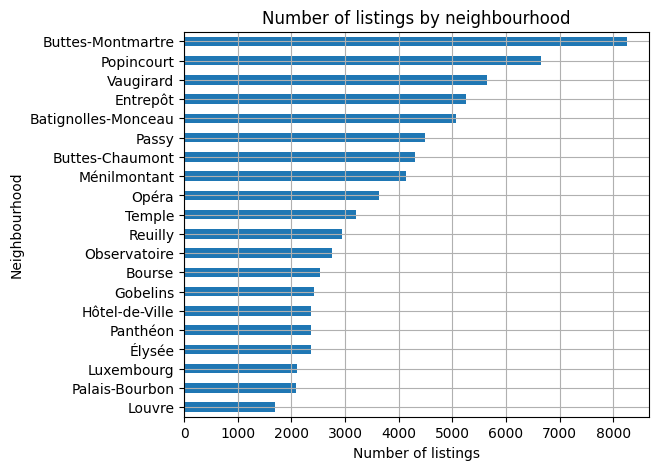

In [40]:
# Plot number of listings by neighbourhood
neighbourhood_count = df["neighbourhood"].value_counts().sort_values(ascending=True)
plt.figure(figsize=(6,5))
neighbourhood_count.plot(kind="barh")
plt.title("Number of listings by neighbourhood")
plt.xlabel("Number of listings")
plt.ylabel("Neighbourhood")
plt.grid(True)
plt.show()

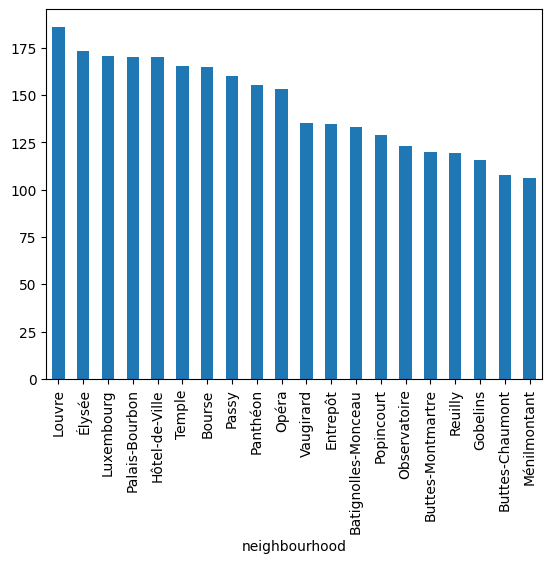

In [41]:
# Plot average price by neighbourhood
neighbourhood_price = df_filtered_price.groupby("neighbourhood")["price"].mean().sort_values(ascending=False)

neighbourhood_price.plot(kind="bar")
plt.show()

In [42]:
# Create a map of all listings with folium -->This helps visualize geographic concentration
lats = df["latitude"].tolist()
longs = df["longitude"].tolist()
locations = list(zip(lats, longs))
map1 = folium.Map(location=[48.85661400, 2.35222190], zoom_start=11.5)

FastMarkerCluster(data=locations).add_to(map1)

#map1.save("all_listings_map.html")
map1

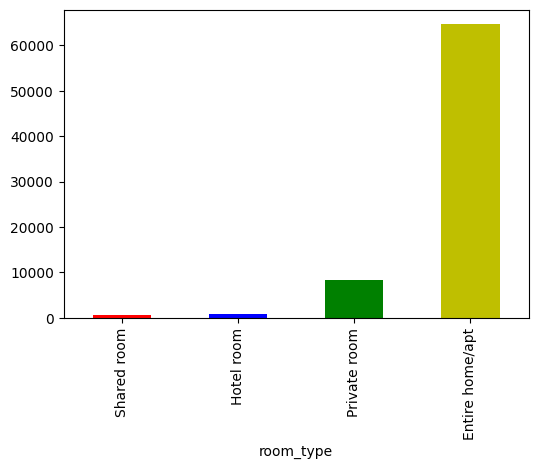

In [43]:
# Plot room types -->This provides insight into which room types are most commonly offered
room_types = df["room_type"].value_counts().sort_values(ascending=True)

plt.figure(figsize=(6,4))
room_types.plot(kind="bar", color=["r", "b", "g", "y"])
plt.show()

In [44]:
# Analyze hosts with private rooms by counting the number of private rooms each host has 
"""
top 20 hosts who offer the most private rooms. This helps in identifying hosts with multiple listings for private rooms, 
which could indicate high activity or commercial properties
"""
private = df[df['room_type'] == "Private room"]
host_private = private.groupby(['host_id', 'host_name']).size().reset_index(name='private_rooms').sort_values(by=['private_rooms'], ascending=False)

print(host_private.head(20))

        host_id                         host_name  private_rooms
5743  460047164                        FlexLiving            177
4188  117238503                            Sophie             33
5441  362016220                    Sonder (Paris)             27
5541  397076625                         Machefert             26
1210   12938211                  Luxury Worldwide             24
5539  396754479                      HappyCulture             23
4129  110402903                Isabelle & Thierry             21
3018   46443228                            Xavier             17
5263  316370512                    Hôtel Félicité             16
3992   97884072                       Hotel SUNNY             15
5079  268319255                            Karine             15
5845  486460832                             David             14
4943  234972314                 Courcelles Etoile             13
5486  375098995                             Karim             13
3872   87242375          

In [45]:
# Analyze top hosts with the most total listings by aggregating across all room types
#-->providing insight into key players in the Paris Airbnb market
top_hosts = df.groupby(["host_id", "host_name", "latitude", "longitude"])["calculated_host_listings_count"].sum().reset_index(name="total_listings").sort_values(by="total_listings", ascending=False).head(10)

print(top_hosts)

         host_id   host_name   latitude  longitude  total_listings
57142  314994947  Blueground  48.878249   2.374021            8164
57016  314994947  Blueground  48.867523   2.331448            7536
35329   50978178   Sebastien  48.845023   2.261489            5586
35371   50978178   Sebastien  48.864543   2.332195            5586
56973  314994947  Blueground  48.864173   2.349573            5024
57069  314994947  Blueground  48.872729   2.302179            5024
35383   50978178   Sebastien  48.868186   2.331164            4998
35375   50978178   Sebastien  48.865850   2.336740            4704
35366   50978178   Sebastien  48.863050   2.354630            4116
35452   50978178   Sebastien  48.875260   2.325720            3822


In [46]:
# Create a map of top hosts with folium, this helps visualize where the most active hosts are 

m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

for index, row in top_hosts.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['host_name']} - Total Listings: {row['total_listings']}",
        icon=folium.Icon(color='blue', icon='home')
    ).add_to(m)

#m.save("top_hosts_map.html")
m

In [47]:
# Create a heatmap of top 100 expensive listings 
#-->geographic concentration of the 100 most expensive listings in Paris. This helps in identifying high-value areas within the city
top_100_expensive = df_filtered_price.sort_values(by="price", ascending=False).head(100)

m = folium.Map(location=[48.8566, 2.3522], zoom_start=12)

heat_data = [[row['latitude'], row['longitude']] for index, row in top_100_expensive.iterrows()]

HeatMap(heat_data, radius=15).add_to(m)

#m.save("expensive_listings_heatmap.html")
m


#- Red Areas: These are the highest density areas, meaning the concentration of listings (or data points) is very high
#- Yellow/Orange Areas: These represent moderately high density areas. They are still areas of significant concentration
#- Green and Light Blue Areas: These are low to moderate density zones
#- Dark Blue Areas: These represent low density areas
